In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 13.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=a2692c1144497ee8980bc1c0b693c1421f6cbf2c2322143e3cc68897f4df5b91
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
import mglearn

In [8]:
x, y = make_blobs(n_samples=100 ,n_features=3, random_state=0)
agc = AgglomerativeClustering(n_clusters=2)
agc.fit(x)
x

array([[ 1.50876737, -2.40426734,  1.29679476],
       [ 1.11992356, -1.09172105,  2.87213416],
       [ 0.40675281,  4.47917386,  1.59276198],
       [ 0.60904044, -0.47892179,  3.1678398 ],
       [ 1.52986507, -2.07655991,  3.439008  ],
       [ 0.7856141 ,  4.75242485,  1.06283775],
       [-0.42878917,  8.35744775, 10.47051507],
       [ 0.79468751,  5.71399196,  1.68079583],
       [ 0.49685028,  4.61515083,  1.27924705],
       [ 0.94756207, -2.46243447,  3.20526991],
       [ 0.84319882, -3.3381828 ,  2.28670704],
       [-0.41868468,  7.62814202, 10.39125382],
       [-0.20067044,  7.41156378,  5.75848709],
       [ 1.01251754, -2.1127192 ,  3.2166543 ],
       [ 2.24238861,  3.79791079,  4.6004683 ],
       [ 0.29749269,  3.95015947,  1.31452005],
       [ 0.20050773,  5.29949868,  0.12206274],
       [-0.11042891,  7.66630276,  8.50934154],
       [ 0.3904472 ,  5.24134617,  1.80065943],
       [-1.0411802 ,  8.35892304,  8.57386039],
       [ 1.00601321, -1.26523554,  2.003

[0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0]


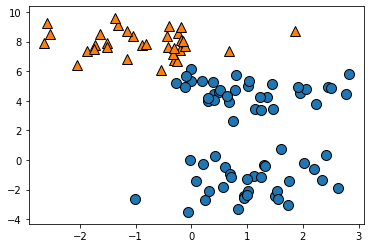

In [17]:
result = agc.fit_predict(x)
print(result)
mglearn.discrete_scatter(x[:, 0], x[:, 1], result)

In [18]:
def plot_dendrogram(model, ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, ax=ax, **kwargs)

model_ward = AgglomerativeClustering(n_clusters=None, 
                                distance_threshold=0,
                                )
model_ward.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

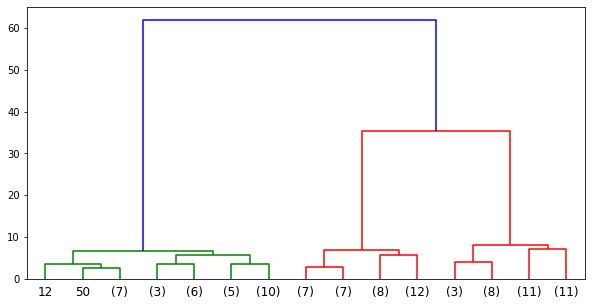

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_dendrogram(model_ward, ax=ax, truncate_mode='level', p=3)
fig.show()

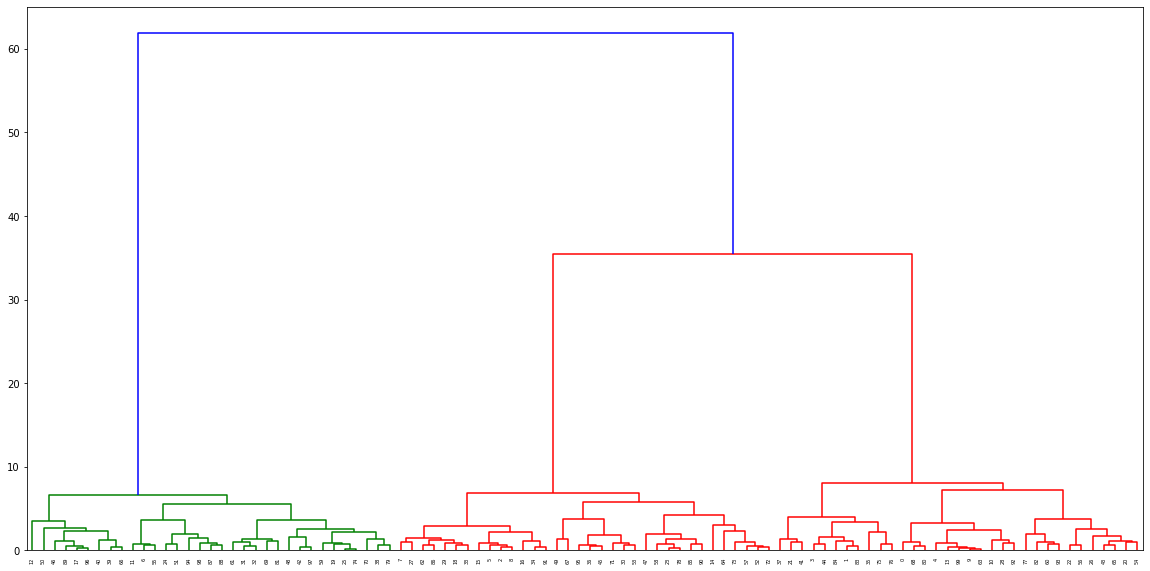

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
linkage_arr = ward(x)
dendrogram(linkage_arr, ax=ax)
fig.show()